In [ ]:
import cv2
import numpy as np
import os
import glob
CHECKERBOARD = (6,9)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
objpoints = []
imgpoints = []
objp = np.zeros((1, CHECKERBOARD[0] * CHECKERBOARD[1], 3), np.float32)
objp[0,:,:2] = np.mgrid[0:CHECKERBOARD[0], 0:CHECKERBOARD[1]].T.reshape(-1, 2)
prev_img_shape = None
images = glob.glob('chessboard.jpg')
print(images)
for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    ret, corners = cv2.findChessboardCorners(gray, CHECKERBOARD, cv2.CALIB_CB_ADAPTIVE_THRESH + cv2.CALIB_CB_FAST_CHECK + cv2.CALIB_CB_NORMALIZE_IMAGE)
    if ret == True:
        objpoints.append(objp)
        corners2 = cv2.cornerSubPix(gray, corners, (11,11),(-1,-1), criteria)
        imgpoints.append(corners2)
        img = cv2.drawChessboardCorners(img, CHECKERBOARD, corners2, ret)
    cv2.imshow('img',img)
    cv2.waitKey(0)
 
cv2.destroyAllWindows()
h,w = img.shape[:2]
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
print("Camera matrix : \n")
print(mtx)
print("dist : \n")
print(dist)
print("rvecs : \n")
print(rvecs)
print("tvecs : \n")
print(tvecs)

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Checkerboard dimensions
CHECKERBOARD = (6, 9)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

# 3D points
objpoints = [(100,90),(380,20),(535,265),(210,375)]  # 3D points
imgpoints = [(100,50),(400,50),(400,375),(100,375)]  # 2D points

objp = np.zeros((1, CHECKERBOARD[0] * CHECKERBOARD[1], 3), np.float32)
objp[0, :, :2] = np.mgrid[0:CHECKERBOARD[0], 0:CHECKERBOARD[1]].T.reshape(-1, 2)

# Load the single image
img = cv2.imread('chessboard.jpg')  # Path to your single image
if img is None:
    print("Error: Image not found!")
    exit()

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Find chessboard corners
ret, corners = cv2.findChessboardCorners(gray, CHECKERBOARD, 
                                        cv2.CALIB_CB_ADAPTIVE_THRESH + 
                                        cv2.CALIB_CB_FAST_CHECK + 
                                        cv2.CALIB_CB_NORMALIZE_IMAGE)

if ret:
    objpoints.append(objp)
    corners2 = cv2.cornerSubPix(gray, corners, (11, 11), (-1, -1), criteria)
    imgpoints.append(corners2)

    # Draw and display corners using Matplotlib
    img_with_corners = cv2.drawChessboardCorners(img, CHECKERBOARD, corners2, ret)
    img_rgb = cv2.cvtColor(img_with_corners, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for Matplotlib

    # Plot the image with X and Y axes
    plt.figure(figsize=(8, 6))
    plt.imshow(img_rgb)
    plt.title("Chessboard Corners with X and Y Axes")
    plt.xlabel("X Axis (Pixels)")
    plt.ylabel("Y Axis (Pixels)")
    plt.grid(True)  # Optional grid
    plt.show()
else:
    print("Error: Chessboard corners not found.")
    exit()

Error: Chessboard corners not found.


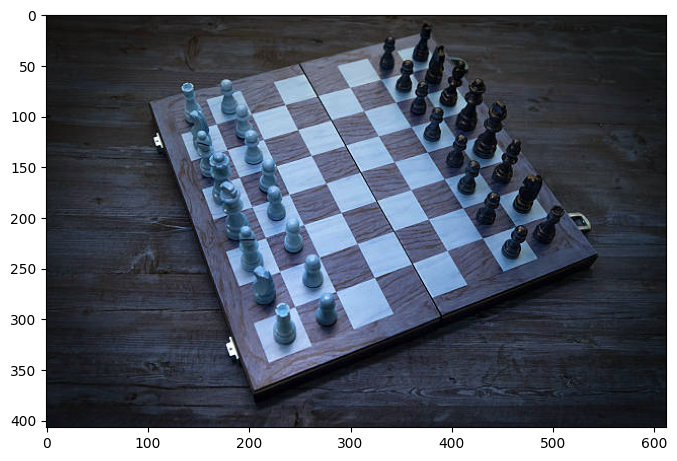

In [4]:
import matplotlib.pyplot as plt
import cv2
images = cv2.imread('chessboard.jpg')
plt.figure(figsize=(8,6))
plt.imshow(images)